In [ ]:
# In this notebook varya is trying (finally) to do spatial downscaling of the era5data over langtang



In [1]:
# Load libraries

from TopoPyScale import topoclass as tc
from TopoPyScale import topo_plot as plot
import matplotlib.pyplot as plt

import pprint

In [2]:
# make config file
# load dem
# do dem things

In [3]:
# ========= STEP 1 ==========
# Load Configuration
config_file = './config_spatial.yml'
mp = tc.Topoclass(config_file)


---> Output directory cleaned
---> no FSM directory to clean
---> no ensemble directory to clean

---> DEM file found
{'latN': 29, 'latS': 28, 'lonW': 85, 'lonE': 86}
Project lat/lon extent:

	------------------------------
	|        North:29          |
	|West:85          East:86|
	|        South:28          |
	------------------------------


---> Loading ERA5 surf climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF SURF data found:
0    SURF_202001.nc
Name: target_file, dtype: object


---> Loading ERA5 plev climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF PLEV data found:
0    PLEV_202001.nc
Name: target_file, dtype: object


## print out configurations 

In [4]:
# Print out config
print('--------- Project Configuration ------')
pprint.pprint(mp.config.project)
print('\n')
print('--------- Climate Data Configuration ------')
pprint.pprint(mp.config.climate)
print('\n')
print('--------- DEM Data Configuration ------')
pprint.pprint(mp.config.dem)
print('\n')
print('--------- Sampling Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- toposcale Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- Outputs Configuration ------')
pprint.pprint(mp.config.outputs)
print('\n')

--------- Project Configuration ------
{'CPU_cores': 6,
 'authors': ['Filhol S.',
             'Aalstad K.',
             'Fiddes J.',
             DefaultMunch({}, {'adjusted': 'bazilova v'})],
 'climate': 'era5',
 'date': 'Feb 2024',
 'description': 'Downscaling for Finse, Benchmarking TopoPyScale',
 'directory': './',
 'end': datetime.date(2020, 1, 30),
 'extent': {'latN': 29, 'latS': 28, 'lonE': 86, 'lonW': 85},
 'name': 'Langtang',
 'split': DefaultMunch({}, {'IO': False, 'time': 1, 'space': 'None'}),
 'start': datetime.date(2020, 1, 1)}


--------- Climate Data Configuration ------
{'era5': {'download_threads': 17,
          'path': 'inputs/climate/',
          'plevels': [350,
                      400,
                      450,
                      500,
                      550,
                      600,
                      650,
                      700,
                      750,
                      775,
                      800,
                      825,
          

## 1.2. Load DEM and Compute Morphometrics


In [13]:
%%time 
# Load DEM and derive terrain parameters
mp.compute_dem_param()


---> No ds_param.nc Dataset found. DEM .//inputs/dem/langtangish_dem.tif available.

---> Extracting DEM parameters (slope, aspect, svf)
Computing slope and aspect ...
Computing svf ...
---> File outputs/ds_param.nc saved
CPU times: user 4min 38s, sys: 881 ms, total: 4min 38s
Wall time: 4min 41s


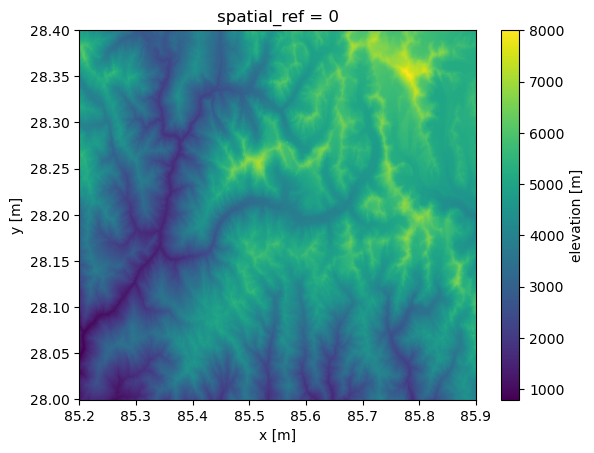

In [15]:
mp.toposub.ds_param.elevation.plot()


## 1.3. Segment DEM in Clusters


In [16]:
mp.extract_topo_param()


---> Scaling data prior to clustering
---> Clustering with Mini-Batch K-means in 10 clusters
---> Mini-Batch Kmean finished in 0.0s
---> File outputs/ds_param.nc saved
Convert coordinates from EPSG:32632 to EPSG:4326
---> Centroids file df_centroids.pck saved


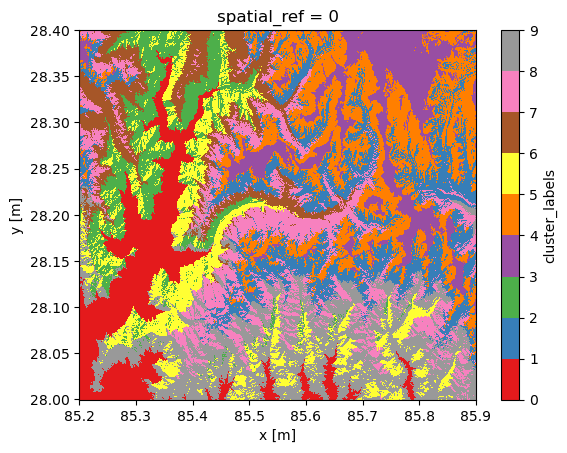

In [17]:
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.Set1)


In [18]:
print('Dataframe containing clusters average properties:\n')
mp.toposub.df_centroids

Dataframe containing clusters average properties:



x          y    elevation     slope  aspect_cos  aspect_sin   
0  85.339289  28.131848  2048.949018  1.570780    0.014215   -0.061993  \
1  85.670929  28.212413  4951.025843  1.570752    0.543108    0.271202   
2  85.357932  28.269963  3201.943836  1.570776    0.207421    0.504382   
3  85.719811  28.299960  6072.510864  1.570773   -0.008562    0.250638   
4  85.705315  28.268635  5365.519409  1.563785   -0.009154   -0.455428   
5  85.465704  28.155365  3233.046277  1.570778   -0.484743   -0.462519   
6  85.384815  28.305978  4008.338953  1.570779    0.464815   -0.182916   
7  85.547052  28.184634  4415.352094  1.570773   -0.667043    0.159463   
8  85.608566  28.084072  4094.624464  1.570778    0.633207   -0.180283   
9  85.519051  28.044581  2852.741419  1.570782    0.500552    0.075042   

        svf  spatial_ref    aspect point_id       lon       lat  
0  0.056158          0.0  3.174065        0  4.512021  0.000254  
1  0.074568          0.0  2.527420        1  4.512024  0.000254  
2  0.020673          0.0  2.309345        2  4.512021  0.000255  
3  0.210740          0.0  2.805515        3  4.512024  0.000255  
4  0.052227          0.0  3.991100        4  4.512024  0.000255  
5  0.034396          0.0  3.816459        5  4.512022  0.000254  
6  0.054944          0.0  3.470967        6  4.512021  0.000255  
7  0.044279          0.0  2.963291        7  4.512023  0.000254  
8  0.197238          0.0  3.588439        8  4.512023  0.000253  
9  0.176948          0.0  3.204587        9  4.512022  0.000253

## 1.4. Compute Solar Geometry


In [19]:
mp.compute_solar_geometry()



---> Computing solar geometry
---> File outputs/ds_solar.nc saved


In [20]:
mp.ds_solar


<xarray.Dataset>
Dimensions:         (point_id: 10, time: 720)
Coordinates:
  * point_id        (point_id) int64 0 1 2 3 4 5 6 7 8 9
  * time            (time) datetime64[ns] 2020-01-01 ... 2020-01-30T23:00:00
    reference_time  datetime64[ns] 2020-01-01
Data variables:
    zenith          (point_id, time) float64 2.734 2.629 2.442 ... 2.559 2.754
    azimuth         (point_id, time) float64 -0.1521 -0.6465 ... 0.9882 0.645
    elevation       (point_id, time) float64 -1.163 -1.058 ... -0.9885 -1.183
    mu0             (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    SWtoa           (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    sunset          (point_id, time) bool True True True True ... True True True

Text(0.5, 1.0, 'Solar Zenith')

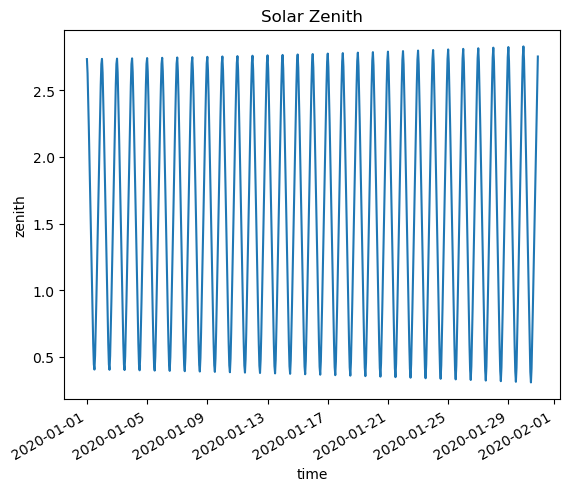

In [21]:
mp.ds_solar.zenith.sel(point_id=1).plot()
plt.title('Solar Zenith')

## 1.5. Compute Horizon Angles


In [22]:
mp.compute_horizon()



---> Computing horizons with 10 degree increments
---> File outputs/da_horizon.nc saved
---> Centroids file df_centroids.pck updated with horizons


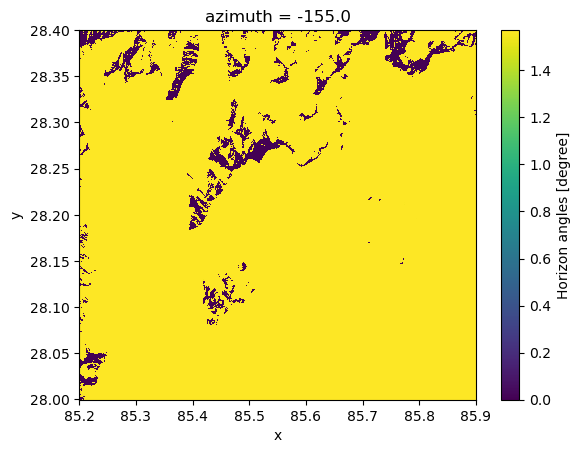

In [23]:
mp.da_horizon.isel(azimuth=2).plot()


## 1.6. Downscale Climate to Clusters


In [24]:
mp.downscale_climate()



---> Downscaling climate to list of points using TopoScale
outputs/tmp cleaned
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing plev for point 0
Preparing plev for point 1
Preparing plev for point 2
Preparing plev for point 3
Preparing plev for point 4
Preparing plev for point 5
Preparing plev for point 6
Preparing plev for point 7
Preparing plev for point 8
Preparing plev for point 9


IndexError: index 8 is out of bounds for axis 0 with size 8

In [ ]:
# ========== STEP 2 ===========
# Extract DEM parameters for points of interest (centroids or physical points)
mp.compute_dem_param()
mp.extract_topo_param()

In [ ]:
# ========= STEP 3 ==========
# compute solar geometry and horizon angles
mp.compute_solar_geometry()
mp.compute_horizon()

In [ ]:
mp.da_horizon.isel(azimuth=2).plot()


In [ ]:
# All terrain data are contained into ds_param
mp.toposub.ds_param

In [ ]:
mp.toposub.ds_param.elevation.plot()


In [ ]:
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.Set1)


In [ ]:
mp.ds_solar.zenith.sel(point_id=1).plot()
plt.title('Solar Zenith')

## downscaling part

In [ ]:
mp.downscale_climate()
